Titanic Data Analysis

In [4]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [8]:
print(train_df.columns.values)

['passenger_id' 'pclass' 'name' 'sex' 'age' 'sibsp' 'parch' 'ticket'
 'fare' 'cabin' 'embarked' 'boat' 'body' 'home.dest' 'survived']


In [9]:
train_df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [10]:
train_df.tail()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
845,158,1,"Hipkins, Mr. William Edward",male,55.0,0,0,680,50.000,C39,S,NaN,NaN,London / Birmingham,0
846,174,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.700,B37,C,NaN,258.0,"Buffalo, NY",0
847,467,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.000,NaN,S,12,NaN,"Moscow / Bronx, NY",1
848,1112,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.775,NaN,S,NaN,NaN,NaN,0
849,425,2,"Greenberg, Mr. Samuel",male,52.0,0,0,250647,13.000,NaN,S,NaN,19.0,"Bronx, NY",0


In [11]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
passenger_id    850 non-null int64
pclass          850 non-null int64
name            850 non-null object
sex             850 non-null object
age             676 non-null float64
sibsp           850 non-null int64
parch           850 non-null int64
ticket          850 non-null object
fare            849 non-null float64
cabin           191 non-null object
embarked        849 non-null object
boat            308 non-null object
body            73 non-null float64
home.dest       464 non-null object
survived        850 non-null int64
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age        

In [12]:
train_df.describe()

,passenger_id,pclass,age,sibsp,parch,fare,body,survived
count,850.000000,850.00000,676.000000,850.000000,850.000000,849.000000,73.000000,850.000000
mean,662.816471,2.32000,29.519847,0.522353,0.382353,34.012701,165.821918,0.368235
std,380.751936,0.83853,14.562243,1.112132,0.879511,53.705779,99.068487,0.482610
min,1.000000,1.00000,0.166700,0.000000,0.000000,0.000000,4.000000,0.000000
25%,332.250000,2.00000,20.000000,0.000000,0.000000,7.895800,75.000000,0.000000
50%,676.500000,3.00000,28.000000,0.000000,0.000000,14.108300,166.000000,0.000000
75%,992.250000,3.00000,37.000000,1.000000,0.000000,31.000000,260.000000,1.000000
max,1307.000000,3.00000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


In [13]:
train_df.describe(include=['O'])

,name,sex,ticket,cabin,embarked,boat,home.dest
count,850,850,850,191,849,308,464
unique,849,2,660,135,3,26,272
top,"Kelly, Mr. James",male,CA. 2343,B57 B59 B63 B66,S,4,"New York, NY"
freq,2,551,10,4,589,25,36


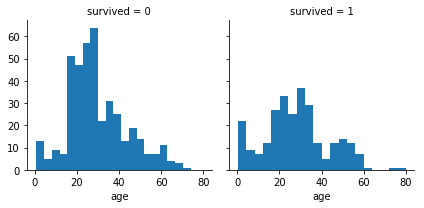

In [23]:
g = sns.FacetGrid(train_df, col='survived')
g.map(plt.hist, 'age', bins=20)

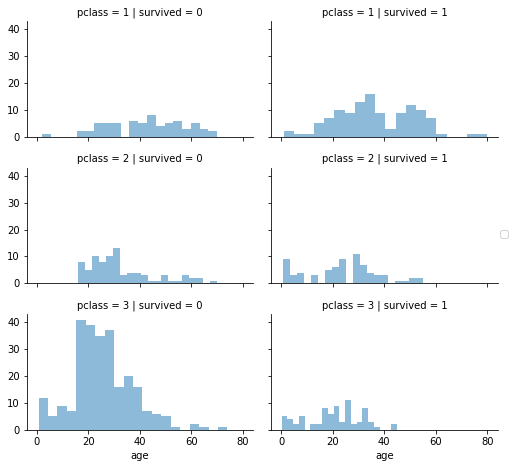

In [25]:
grid = sns.FacetGrid(train_df, col='survived', row='pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

this plot confirms our assumption that pclass 1 has high Survival rate while it also shows that most of
the people died in Pclass 3

In [26]:
train_df[ 'age' ].min(),train_df['age'].max()

(0.1667, 80.0)

In [27]:
train_df['survived'].value_counts()*100/len(train_df)

0    63.176471
1    36.823529
Name: survived, dtype: float64

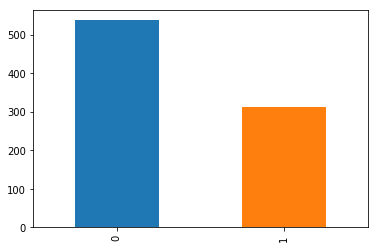

In [28]:
%matplotlib inline
alpha_color=0.5
train_df['survived'].value_counts().plot(kind='bar')

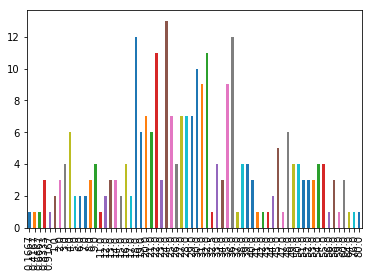

In [29]:
train_df[train_df['survived']==1]['age'].value_counts().sort_index().plot(kind='bar')

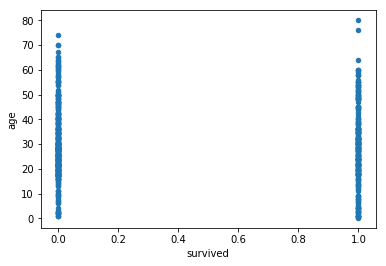

In [30]:
train_df.plot(kind='scatter',x='survived',y='age')

E:\Anaconda\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
E:\Anaconda\lib\site-packages\seaborn\axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


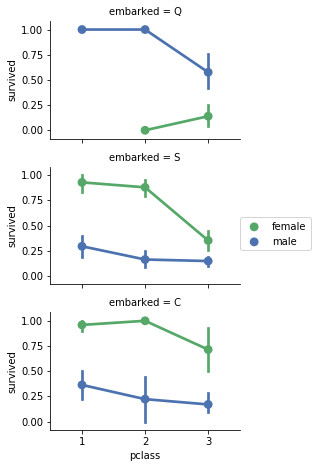

In [32]:
grid = sns.FacetGrid(train_df, row='embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'pclass', 'survived', 'sex', palette='deep')
grid.add_legend()

 Embarked seems to be correlated with survival, depending on the gender.

 Women on port Q and on port S have a higher chance of survival. The inverse is true, if they are at port
 C. Men have a high survival probability if they are on port C, but a low probability if they are on port
 Q or S.

 Pclass also seems to be correlated with survival. We will generate another plot of it below.

E:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
E:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
E:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
E:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Male')

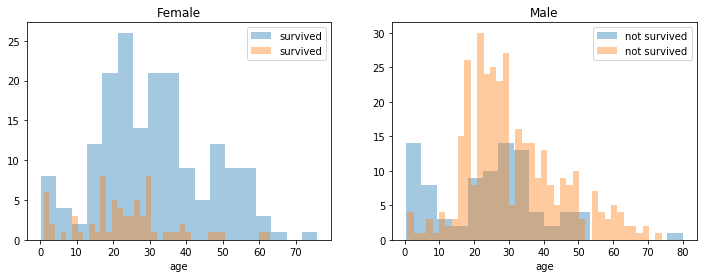

In [36]:
survived='survived'
not_survived='not survived'
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(12,4))
women=train_df[train_df['sex']=='female']
men=train_df[train_df['sex']=='male']
ax = sns.distplot(women[women['survived']==1].age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['survived']==0].age.dropna(),bins=40,label= survived, ax = axes[0], kde = False)
ax.legend()
ax.set_title('Female')
ax=sns.distplot(men[men['survived']==1].age.dropna(),bins=18,label=not_survived,ax=axes[1],kde=False)
ax=sns.distplot(men[men['survived']==0].age.dropna(),bins=40,label=not_survived,ax=axes[1],kde=False)
ax.legend()
ax.set_title('Male')

 You can see that men has high probability between Age 18 to 35 while women has survival rate between
age 14 to 40
 for men the probability rate between 0 to 10 is high but for isnt true for female Another thing to note 
 is that infants also have a little bit higher probability of survival.

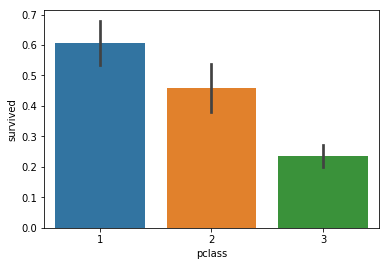

In [37]:
sns.barplot(x='pclass',y='survived', data=train_df)

 Here we see clearly, that Pclass is contributing to a persons chance of survival, especially if this
 person is in class 1. We will create another pclass plot below.